#### SVM 학습예제
#### 자연어 관련 내용으로 할까? 예제를 찾아서 학습을 해보자
## 기본적인 이론 학습

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import metrics

import pandas as pd

irisData=load_iris()
x_data=irisData.data
y_data=irisData.target


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size =0.3)



## 특성 스케일링 (매우중요)
## 머신러닝에서 정규화(normalization)과 표준화(standarization)는 모델성능을 결정하는 가장 중요한 단계
sc=StandardScaler()
sc.fit(x_train)
x_train_std=sc.transform(x_train)
x_test_std=sc.transform(x_test)

## SVM model 생성
svm_model=SVC(kernel='rbf',C=8, gamma=0.1)
svm_model.fit(x_train_std,y_train)
y_pre_tr=svm_model.predict(x_train_std)
score=metrics.accuracy_score(y_pre_tr,y_train)
print('r2 Score is ', score)

y_pre_test=svm_model.predict(x_test_std)
score2=metrics.accuracy_score(y_pre_test,y_test)
print('r2 score(test) is ', score2)


r2 Score is  0.9714285714285714
r2 score(test) is  0.9777777777777777


## SVM Hyperplane 가시화
#### 1. Data 정규화
#### 2. PCA
#### 3. SVM model plot

SVC(kernel='linear')
LinearSVC()
SVC(gamma=0.7)
SVC(kernel='poly')


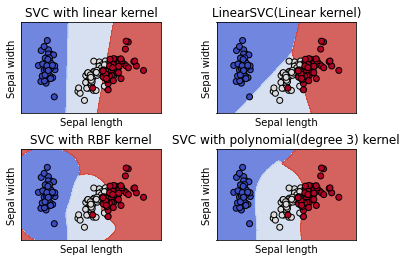

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets, preprocessing

irisData=datasets.load_iris()
x=irisData.data
sc=preprocessing.StandardScaler()
sc.fit(x)
x=sc.transform(x)

## PCA 실행
from sklearn.decomposition import PCA
pca =PCA(n_components=2) # 주성분 몇개로 할지 
PC=pca.fit_transform(x)
y=irisData.target
h= .02

## creat SVM model
C=1.0
svc=svm.SVC(kernel='linear',C=C).fit(PC,y)
rbf_svc=svm.SVC(kernel='rbf',gamma=0.7,C=C).fit(PC,y)
poly_svc=svm.SVC(kernel='poly',degree=3,C=C).fit(PC,y)
lin_svc=svm.LinearSVC(C=C).fit(PC,y)





## creat mesh plot
x_min, x_max = PC[:,0].min()-1, PC[:,0].max() +1
y_min, y_max = PC[:,1].min()-1, PC[:,1].max() +1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),
                    np.arange(x_min,x_max,h))

Titles = ['SVC with linear kernel','LinearSVC(Linear kernel)',
            'SVC with RBF kernel', 'SVC with polynomial(degree 3) kernel']


for i, clf in enumerate ((svc, lin_svc, rbf_svc, poly_svc)):
    #
    #
    plt.subplot(2,2,i+1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    print(clf)
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)                                   # reshape and shape ??
    
    plt.contourf(xx,yy,Z, cmap=plt.cm.coolwarm,alpha=0.8)
    plt.scatter(PC[:, 0], PC[:, 1], c=y, cmap=plt.cm.coolwarm,edgecolors='black')
    # dege
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(Titles[i])

plt.show() # 가시화 